# Documentation

## Notebook History

**Date | Version | Author | Comments**
- 2022-01-23 | 1.1 | Andre Buser | Checked spelling. Updated binning approach (quantiles as integers, no labels).
- 2022-01-15 | 1.0 | Andre Buser | Initial version.

## Open tasks / Last Activitites

Open tasks and/or the latest activities in this section:
- [X] #TODO: **Complete** Data Science Ethics Checklist

## Purpose

The objective of this **stage two** notebook is to clean and prepare the **CPI** dataset for the EDA phase.

## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [**NA**] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [**NA**] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [**NA**] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII), for example, through anonymization or not collecting information that isn't relevant for analysis?
 - [**NA**] **A.4 Downstream bias mitigation**: Have we considered ways to test downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [**NA**] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [**NA**] **B.2 Right to be forgotten**: Do we have a mechanism for individuals to request their personal information be removed?
 - [**NA**] **B.3 Data retention plan**: Is there a schedule to delete the data after it is no longer needed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*

# Setup Environment

## Install Modules

List !pip install commands for modules which are not part of the Google Colabs standard environment. For local environment, please use the provided installation files and environments.

In [54]:
#!pip install colorama # colorize output text
#!pip install missingno # for analyzing missing values
#!pip install scikit-learn

# document module versions
!pip install watermark

# required to use pickle files, protocol 2
!pip install pandas --upgrade 

## Import Modules

In [55]:
# Base libraries
import os
import sqlite3

# Scientific libraries
import numpy as np
import pandas as pd

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load magic commands
%load_ext watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Define Parameters

In [56]:
# Paths: Local Setup
PATH_EXT = "../data/external/"
PATH_RAW = "../data/raw/"
PATH_INT = "../data/interim/"
PATH_PRO = "../data/processed/"
PATH_REP = "../reports/"
PATH_FIGS = "../reports/figures/"

In [57]:
"""
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Paths: Google Colabs Setup
PATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"
PATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"
PATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"
PATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"
PATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"
PATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"
"""

'\n# Mount Google Drive\nfrom google.colab import drive\ndrive.mount(\'/content/drive\', force_remount=True)\n\n# Paths: Google Colabs Setup\nPATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"\nPATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"\nPATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"\nPATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"\nPATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"\nPATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"\n'

In [58]:
# Set global seed
seed = 42

# Define available cpu cores
n_cpu = os.cpu_count()
print("Number of CPUs used:", n_cpu)

Number of CPUs used: 16


# Load Data

In [59]:
FILENAME = "CPI2020_GlobalTablesTS_210125.xlsx"
data_path = os.path.join(PATH_EXT, FILENAME)
df = pd.read_excel(data_path, sheet_name="CPI Timeseries 2012 - 2020", engine="openpyxl", skiprows=2)


In [60]:
df.head()
df.info()

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,Standard error 2019,CPI score 2018,Rank 2018,Sources 2018,Standard error 2018,CPI score 2017,Rank 2017,Sources 2017,Standard error 2017,CPI score 2016,Sources 2016,Standard error 2016,CPI score 2015,Sources 2015,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,1.775809,87,1,8,2.542474,88,1,8,2.63,88,2,8,2.75,90.0,7.0,2.46,91.0,7.0,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
1,New Zealand,NZL,AP,88,1,8,1.479342,87,1,8,2.286490,87,2,8,2.44,89,1,8,2.40,90.0,7.0,2.56,91.0,7.0,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
2,Finland,FIN,WE/EU,85,3,8,1.748594,86,3,8,2.924511,85,3,8,2.74,85,3,8,2.84,89.0,7.0,1.46,90.0,7.0,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
3,Singapore,SGP,AP,85,3,9,1.203239,85,4,9,2.048400,85,3,9,1.98,84,6,9,2.26,84.0,8.0,2.35,85.0,8.0,2.02,84.0,8.0,1.75,86.0,9.0,2.3,87.0,9.0,2.1
4,Sweden,SWE,WE/EU,85,3,8,1.303953,85,4,8,1.977693,85,3,8,2.02,84,6,8,2.27,88.0,7.0,1.33,89.0,7.0,1.71,87.0,7.0,3.41,89.0,7.0,2.3,88.0,7.0,1.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              180 non-null    object 
 1   ISO3                 180 non-null    object 
 2   Region               180 non-null    object 
 3   CPI score 2020       180 non-null    int64  
 4   Rank 2020            180 non-null    int64  
 5   Sources 2020         180 non-null    int64  
 6   Standard error 2020  180 non-null    float64
 7   CPI score 2019       180 non-null    int64  
 8   Rank 2019            180 non-null    int64  
 9   Sources 2019         180 non-null    int64  
 10  Standard error 2019  180 non-null    float64
 11  CPI score 2018       180 non-null    int64  
 12  Rank 2018            180 non-null    int64  
 13  Sources 2018         180 non-null    int64  
 14  Standard error 2018  180 non-null    float64
 15  CPI score 2017       180 non-null    int

In [61]:
FILENAME = "country_master_list.csv"
data_path = os.path.join(PATH_INT, FILENAME)
cml_df = pd.read_csv(data_path)

In [62]:
cml_df.head()
cml_df.info()

,country,country_label
0,AUSTRIA,0
1,BELGIUM,1
2,BULGARIA,2
3,CROATIA,3
4,CYPRUS,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        31 non-null     object
 1   country_label  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


# Clean Data

**Checklist:**
**General**
- [X] Lowercase the column names of the dataframe(s) to make references within the notebook(s) more straightforward and consistent
- [X] Check for consistencies (naming, writing) for all the categorical features
- [X] Create “mapping_key” column based on country+year; used to join the various datasets
- [X] Drop unused columns: keep the following years: [2021, 2022, 2019, 2020, 2018]
- [X] Check for missing values

**Dataset-specific:**
- [X] Calculate cpi score for 2021 based on average
- [X] Create mapping_key column: country+year
- [X] Create category column for cpi score
- [X] Only keep the countries based on the GDPR-fine dataset (as the main dataset), drop the unused/non-relevant countries
- [X] Save the result in SQLite DB-file


## Lowercase the column names

In [63]:
# Lowercase column names
df.columns = df.columns.str.lower()
df

,country,iso3,region,cpi score 2020,rank 2020,sources 2020,standard error 2020,cpi score 2019,rank 2019,sources 2019,standard error 2019,cpi score 2018,rank 2018,sources 2018,standard error 2018,cpi score 2017,rank 2017,sources 2017,standard error 2017,cpi score 2016,sources 2016,standard error 2016,cpi score 2015,sources 2015,standard error 2015,cpi score 2014,sources 2014,standard error 2014,cpi score 2013,sources 2013,standard error 2013,cpi score 2012,sources 2012,standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,1.775809,87,1,8,2.542474,88,1,8,2.63,88,2,8,2.75,90.0,7.0,2.46,91.0,7.0,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
1,New Zealand,NZL,AP,88,1,8,1.479342,87,1,8,2.286490,87,2,8,2.44,89,1,8,2.40,90.0,7.0,2.56,91.0,7.0,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
2,Finland,FIN,WE/EU,85,3,8,1.748594,86,3,8,2.924511,85,3,8,2.74,85,3,8,2.84,89.0,7.0,1.46,90.0,7.0,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
3,Singapore,SGP,AP,85,3,9,1.203239,85,4,9,2.048400,85,3,9,1.98,84,6,9,2.26,84.0,8.0,2.35,85.0,8.0,2.02,84.0,8.0,1.75,86.0,9.0,2.3,87.0,9.0,2.1
4,Sweden,SWE,WE/EU,85,3,8,1.303953,85,4,8,1.977693,85,3,8,2.02,84,6,8,2.27,88.0,7.0,1.33,89.0,7.0,1.71,87.0,7.0,3.41,89.0,7.0,2.3,88.0,7.0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176,8,0.914430,16,173,8,2.048858,18,168,8,2.13,18,169,8,1.60,17.0,7.0,1.41,17.0,7.0,2.64,19.0,7.0,1.69,20.0,7.0,2.3,19.0,7.0,2.1
176,Yemen,YEM,MENA,15,176,7,1.333599,15,177,7,1.885994,14,176,7,1.45,16,175,7,1.85,14.0,7.0,3.05,18.0,6.0,2.66,19.0,6.0,2.37,18.0,6.0,2.6,23.0,6.0,2.2
177,Syria,SYR,MENA,14,178,5,1.576392,13,178,5,1.921515,13,178,5,1.92,14,178,5,1.93,13.0,5.0,1.97,18.0,4.0,5.66,20.0,4.0,5.31,17.0,4.0,3.8,26.0,5.0,2.7
178,Somalia,SOM,SSA,12,179,6,2.292273,9,180,5,1.740826,10,180,6,3.08,9,180,5,2.26,10.0,5.0,2.98,8.0,4.0,2.32,8.0,4.0,2.34,8.0,4.0,1.9,8.0,4.0,2.3


## Extract relevant feature and calculate expected CPI score for 2021

In [64]:
# Extract all columns which contain cpi in the name
df_cpi = pd.DataFrame()
df_cpi = df.loc[:, df.columns.str.contains('cpi')]
df_cpi

,cpi score 2020,cpi score 2019,cpi score 2018,cpi score 2017,cpi score 2016,cpi score 2015,cpi score 2014,cpi score 2013,cpi score 2012
0,88,87,88,88,90.0,91.0,92.0,91.0,90.0
1,88,87,87,89,90.0,91.0,91.0,91.0,90.0
2,85,86,85,85,89.0,90.0,89.0,89.0,90.0
3,85,85,85,84,84.0,85.0,84.0,86.0,87.0
4,85,85,85,84,88.0,89.0,87.0,89.0,88.0
...,...,...,...,...,...,...,...,...,...
175,15,16,18,18,17.0,17.0,19.0,20.0,19.0
176,15,15,14,16,14.0,18.0,19.0,18.0,23.0
177,14,13,13,14,13.0,18.0,20.0,17.0,26.0
178,12,9,10,9,10.0,8.0,8.0,8.0,8.0


In [65]:
# Calculate CPI score for 2021 based on average values over the years
df_cpi['cpi score 2021'] = df_cpi.mean(axis=1).round(0)
df_cpi

C:\Users\buser\AppData\Local\Temp/ipykernel_6228/3362287684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['cpi score 2021'] = df_cpi.mean(axis=1).round(0)


,cpi score 2020,cpi score 2019,cpi score 2018,cpi score 2017,cpi score 2016,cpi score 2015,cpi score 2014,cpi score 2013,cpi score 2012,cpi score 2021
0,88,87,88,88,90.0,91.0,92.0,91.0,90.0,89.0
1,88,87,87,89,90.0,91.0,91.0,91.0,90.0,89.0
2,85,86,85,85,89.0,90.0,89.0,89.0,90.0,88.0
3,85,85,85,84,84.0,85.0,84.0,86.0,87.0,85.0
4,85,85,85,84,88.0,89.0,87.0,89.0,88.0,87.0
...,...,...,...,...,...,...,...,...,...,...
175,15,16,18,18,17.0,17.0,19.0,20.0,19.0,18.0
176,15,15,14,16,14.0,18.0,19.0,18.0,23.0,17.0
177,14,13,13,14,13.0,18.0,20.0,17.0,26.0,16.0
178,12,9,10,9,10.0,8.0,8.0,8.0,8.0,9.0


In [66]:
# Create new dataframe with the country names and ISO3
df_country = pd.DataFrame()
df_country = df[['country','iso3']]

In [67]:
df_country.head()

,country,iso3
0,Denmark,DNK
1,New Zealand,NZL
2,Finland,FIN
3,Singapore,SGP
4,Sweden,SWE


In [68]:
df = pd.concat([df_country,df_cpi], axis=1)
df

,country,iso3,cpi score 2020,cpi score 2019,cpi score 2018,cpi score 2017,cpi score 2016,cpi score 2015,cpi score 2014,cpi score 2013,cpi score 2012,cpi score 2021
0,Denmark,DNK,88,87,88,88,90.0,91.0,92.0,91.0,90.0,89.0
1,New Zealand,NZL,88,87,87,89,90.0,91.0,91.0,91.0,90.0,89.0
2,Finland,FIN,85,86,85,85,89.0,90.0,89.0,89.0,90.0,88.0
3,Singapore,SGP,85,85,85,84,84.0,85.0,84.0,86.0,87.0,85.0
4,Sweden,SWE,85,85,85,84,88.0,89.0,87.0,89.0,88.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,15,16,18,18,17.0,17.0,19.0,20.0,19.0,18.0
176,Yemen,YEM,15,15,14,16,14.0,18.0,19.0,18.0,23.0,17.0
177,Syria,SYR,14,13,13,14,13.0,18.0,20.0,17.0,26.0,16.0
178,Somalia,SOM,12,9,10,9,10.0,8.0,8.0,8.0,8.0,9.0


In [69]:
df_cpi = pd.melt(df, id_vars=['country','iso3'], value_vars=['cpi score 2021','cpi score 2020','cpi score 2019', 'cpi score 2018'], value_name='cpi_score')
df_cpi['year'] = df_cpi['variable'].str[-4:]
df_cpi.drop('variable', axis=1, inplace=True)
df_cpi.sort_values(['country','year'], inplace=True)
df_cpi.reset_index(drop=True, inplace=True)
df_cpi['year'] = df_cpi['year'].astype(int)
df_cpi

,country,iso3,cpi_score,year
0,Afghanistan,AFG,16.0,2018
1,Afghanistan,AFG,16.0,2019
2,Afghanistan,AFG,19.0,2020
3,Afghanistan,AFG,13.0,2021
4,Albania,ALB,36.0,2018
...,...,...,...,...
715,Zambia,ZMB,36.0,2021
716,Zimbabwe,ZWE,22.0,2018
717,Zimbabwe,ZWE,24.0,2019
718,Zimbabwe,ZWE,24.0,2020


In [70]:
# Binning
df_cpi['cpi_score_cat'] = df_cpi['cpi_score'].round(-1) #old approach
df_cpi['cpi_score_cat2'] = pd.qcut(df_cpi['cpi_score'], q=10, labels=False, precision=0) # new binning approach, maybe the correlation coeff. improves
df_cpi['cpi_score_cat2'] = df_cpi['cpi_score_cat2'].astype(float)
df_cpi

,country,iso3,cpi_score,year,cpi_score_cat,cpi_score_cat2
0,Afghanistan,AFG,16.0,2018,20.0,0.0
1,Afghanistan,AFG,16.0,2019,20.0,0.0
2,Afghanistan,AFG,19.0,2020,20.0,0.0
3,Afghanistan,AFG,13.0,2021,10.0,0.0
4,Albania,ALB,36.0,2018,40.0,4.0
...,...,...,...,...,...,...
715,Zambia,ZMB,36.0,2021,40.0,4.0
716,Zimbabwe,ZWE,22.0,2018,20.0,1.0
717,Zimbabwe,ZWE,24.0,2019,20.0,1.0
718,Zimbabwe,ZWE,24.0,2020,20.0,1.0


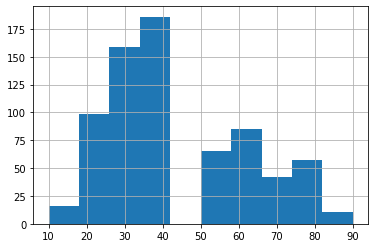

In [71]:
# Checking the distribution
df_cpi['cpi_score_cat'].hist();

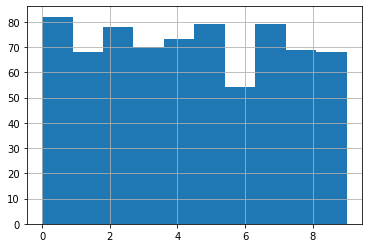

In [72]:
df_cpi['cpi_score_cat2'].hist();

In [73]:
df = df_cpi.copy()

## Check for consistencies (naming, writing) and apply required cleaning and transformation steps

### country column

In [74]:
df['country'] = df['country'].str.upper()
df['country'].unique().tolist()
print('Result:\n - Align country names with country master list, .e.g. UK with UNITED KINGDOM.\n - Uppercase country names')

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANGOLA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BENIN',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRUNEI DARUSSALAM',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CABO VERDE',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COSTA RICA',
 "COTE D'IVOIRE",
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECHIA',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ESTONIA',
 'ESWATINI',
 'ETHIOPIA',
 'FINLAND',
 'FRANCE',
 'GABON',
 'GAMBIA',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GRENADA',
 'GUATEMALA',
 'GUINEA',
 'GUINEA BISSAU',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HONG KONG',
 'HUNGARY',
 'ICELAND',
 'INDIA',
 '

Result:
 - Align country names with country master list, .e.g. UK with UNITED KINGDOM.
 - Uppercase country names


In [75]:
# Create country lists for comparision
cml_list = cml_df['country'].unique().tolist()
df_country_list = set(df['country'].unique().tolist())

In [76]:
# Check if master country can be found in the population country list. 
# If not, we need to check the spelling/writing.
print("Check the writing of the following countries:")
count = 0
for master_country in cml_list:
    if master_country not in df_country_list:
        count += 1
        print(f"{master_country} NOT found in population country list.")

print("Count:", count)

Check the writing of the following countries:
CZECH REPUBLIC NOT found in population country list.
ISLE OF MAN NOT found in population country list.
LIECHTENSTEIN NOT found in population country list.
THE NETHERLANDS NOT found in population country list.
Count: 4


In [77]:
# Rename/replace country names in population dataframe
df.replace('NETHERLANDS','THE NETHERLANDS', inplace=True)
df.replace('CZECHIA','CZECH REPUBLIC', inplace=True)


In [78]:
# Add Isle of Man
df.loc[len(df.index)] = ["ISLE OF MAN", "IMN", np.NAN, 2021, np.NAN, np.NAN]
df.loc[len(df.index)] = ["ISLE OF MAN", "IMN", np.NAN, 2020, np.NAN, np.NAN]
df.loc[len(df.index)] = ["ISLE OF MAN", "IMN", np.NAN, 2019, np.NAN, np.NAN]
df.loc[len(df.index)] = ["ISLE OF MAN", "IMN", np.NAN, 2018, np.NAN, np.NAN]

#ADD Lichtenstein
df.loc[len(df.index)] = ["LIECHTENSTEIN", "LIE", np.NAN, 2021, np.NAN, np.NAN]
df.loc[len(df.index)] = ["LIECHTENSTEIN", "LIE", np.NAN, 2020, np.NAN, np.NAN]
df.loc[len(df.index)] = ["LIECHTENSTEIN", "LIE", np.NAN, 2019, np.NAN, np.NAN]
df.loc[len(df.index)] = ["LIECHTENSTEIN", "LIE", np.NAN, 2018, np.NAN, np.NAN]

In [79]:
# Update country lists for comparision
df_country_list = set(df['country'].unique().tolist())

# Checking if master country can be found in the population country list. If not, we need to check the spelling/writing.
print("Check the writing of the following countries:")
count = 0
for master_country in cml_list:
    if master_country not in df_country_list:
        count += 1
        print(f"{master_country} NOT found in population country list.")

print("Count:", count)
assert count == 0

Check the writing of the following countries:
Count: 0


In [80]:
# Remove unwanted countries
cml_list = cml_df['country'].unique().tolist()

# Only keep countries which are listed in country master list (cml_list)
df = df[df['country'].isin(cml_list)]

In [81]:
df

,country,iso3,cpi_score,year,cpi_score_cat,cpi_score_cat2
28,AUSTRIA,AUT,76.0,2018,80.0,9.0
29,AUSTRIA,AUT,77.0,2019,80.0,9.0
30,AUSTRIA,AUT,76.0,2020,80.0,9.0
31,AUSTRIA,AUT,74.0,2021,70.0,8.0
56,BELGIUM,BEL,75.0,2018,80.0,9.0
...,...,...,...,...,...,...
723,ISLE OF MAN,IMN,NaN,2018,NaN,NaN
724,LIECHTENSTEIN,LIE,NaN,2021,NaN,NaN
725,LIECHTENSTEIN,LIE,NaN,2020,NaN,NaN
726,LIECHTENSTEIN,LIE,NaN,2019,NaN,NaN


### year column

In [82]:
sorted(df['year'].unique().tolist())
print('Result: All good.')

[2018, 2019, 2020, 2021]

Result: All good.


## Create mapping_key column

In [83]:
df['mapping_key'] = df['country'].str.strip()+"-"+df['year'].astype(str)
df['mapping_key'] = df['mapping_key'].str.replace(" ","")
df

,country,iso3,cpi_score,year,cpi_score_cat,cpi_score_cat2,mapping_key
28,AUSTRIA,AUT,76.0,2018,80.0,9.0,AUSTRIA-2018
29,AUSTRIA,AUT,77.0,2019,80.0,9.0,AUSTRIA-2019
30,AUSTRIA,AUT,76.0,2020,80.0,9.0,AUSTRIA-2020
31,AUSTRIA,AUT,74.0,2021,70.0,8.0,AUSTRIA-2021
56,BELGIUM,BEL,75.0,2018,80.0,9.0,BELGIUM-2018
...,...,...,...,...,...,...,...
723,ISLE OF MAN,IMN,NaN,2018,NaN,NaN,ISLEOFMAN-2018
724,LIECHTENSTEIN,LIE,NaN,2021,NaN,NaN,LIECHTENSTEIN-2021
725,LIECHTENSTEIN,LIE,NaN,2020,NaN,NaN,LIECHTENSTEIN-2020
726,LIECHTENSTEIN,LIE,NaN,2019,NaN,NaN,LIECHTENSTEIN-2019


## Add country labels

In [84]:
try:
    cml_df.drop(['iso3'], axis=1, inplace=True) #TODO: Clean-up, remove iso3 from CML
    df = df.merge(cml_df, on='country')

except:
    df = df.merge(cml_df, on='country')
df

,country,iso3,cpi_score,year,cpi_score_cat,cpi_score_cat2,mapping_key,country_label
0,AUSTRIA,AUT,76.0,2018,80.0,9.0,AUSTRIA-2018,0
1,AUSTRIA,AUT,77.0,2019,80.0,9.0,AUSTRIA-2019,0
2,AUSTRIA,AUT,76.0,2020,80.0,9.0,AUSTRIA-2020,0
3,AUSTRIA,AUT,74.0,2021,70.0,8.0,AUSTRIA-2021,0
4,BELGIUM,BEL,75.0,2018,80.0,9.0,BELGIUM-2018,1
...,...,...,...,...,...,...,...,...
119,ISLE OF MAN,IMN,NaN,2018,NaN,NaN,ISLEOFMAN-2018,15
120,LIECHTENSTEIN,LIE,NaN,2021,NaN,NaN,LIECHTENSTEIN-2021,18
121,LIECHTENSTEIN,LIE,NaN,2020,NaN,NaN,LIECHTENSTEIN-2020,18
122,LIECHTENSTEIN,LIE,NaN,2019,NaN,NaN,LIECHTENSTEIN-2019,18


# Update country master list

In [85]:
iso_df = df[['country','iso3']].drop_duplicates()


In [86]:
cml_df = cml_df.merge(iso_df, on='country')

In [87]:
cml_df

,country,country_label,iso3
0,AUSTRIA,0,AUT
1,BELGIUM,1,BEL
2,BULGARIA,2,BGR
3,CROATIA,3,HRV
4,CYPRUS,4,CYP
5,CZECH REPUBLIC,5,CZE
6,DENMARK,6,DNK
7,ESTONIA,7,EST
8,FINLAND,8,FIN
9,FRANCE,9,FRA


# Save Cleaned DataFrame

In [88]:
# Reordering columns
df = df[['mapping_key','country', 'iso3', 'year','cpi_score', 'cpi_score_cat', 'cpi_score_cat2', 'country_label']]
df

,mapping_key,country,iso3,year,cpi_score,cpi_score_cat,cpi_score_cat2,country_label
0,AUSTRIA-2018,AUSTRIA,AUT,2018,76.0,80.0,9.0,0
1,AUSTRIA-2019,AUSTRIA,AUT,2019,77.0,80.0,9.0,0
2,AUSTRIA-2020,AUSTRIA,AUT,2020,76.0,80.0,9.0,0
3,AUSTRIA-2021,AUSTRIA,AUT,2021,74.0,70.0,8.0,0
4,BELGIUM-2018,BELGIUM,BEL,2018,75.0,80.0,9.0,1
...,...,...,...,...,...,...,...,...
119,ISLEOFMAN-2018,ISLE OF MAN,IMN,2018,NaN,NaN,NaN,15
120,LIECHTENSTEIN-2021,LIECHTENSTEIN,LIE,2021,NaN,NaN,NaN,18
121,LIECHTENSTEIN-2020,LIECHTENSTEIN,LIE,2020,NaN,NaN,NaN,18
122,LIECHTENSTEIN-2019,LIECHTENSTEIN,LIE,2019,NaN,NaN,NaN,18


In [89]:
FILENAME = "cpi-CLEANED_p2.pkl"
data_path = os.path.join(PATH_INT, FILENAME)
#df.to_pickle(data_path, protocol=2)

In [90]:
# Saving cleaned dataset as csv to allow quick reviews
FILENAME = "cpi-CLEANED.csv"
data_path = os.path.join(PATH_INT, FILENAME)
df.to_csv(data_path, index=False)

In [91]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
df.to_sql("CPI", con, index=False, if_exists="replace")
con.close()

124

In [92]:
FILENAME = "country_master_list.csv"
data_path = os.path.join(PATH_INT, FILENAME)
cml_df.to_csv(data_path, index=False)

In [93]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
cml_df.to_sql("CML", con, index=False, if_exists="replace")
con.close()

31

# Watermark

In [94]:
%watermark

Last updated: 2022-01-23T23:11:47.995500+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.30.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [95]:
%watermark --iversions

pandas : 1.4.0
sqlite3: 2.6.0
sys    : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]
numpy  : 1.21.4



-----
